# Fake News Detection using Machine Learning on the WELFake Dataset

## Introduction

In today's digital age, the proliferation of fake news has become a significant concern. The ability to automatically detect and classify news articles as real or fake is crucial for maintaining the integrity of information. This project aims to develop a machine learning model that can accurately classify news articles using the WELFake dataset. This notebook documents the entire process, from data loading and preprocessing to model training, evaluation, and deployment.

---

## Table of Contents

1. [Importing Libraries](#importing-libraries)
2. [Loading and Exploring the Data](#loading-and-exploring-the-data)
   - [Dataset Description](#dataset-description)
   - [Initial Data Inspection](#initial-data-inspection)
3. [Data Preprocessing](#data-preprocessing)
   - [Handling Missing Values](#handling-missing-values)
   - [Exploratory Data Analysis](#exploratory-data-analysis)
     - [Text Length Analysis](#text-length-analysis)
   - [Text Cleaning](#text-cleaning)
     - [Tokenization, Stopword Removal, and Stemming](#text-cleaning-steps)
4. [Feature Extraction](#feature-extraction)
   - [TF-IDF Vectorization](#tf-idf-vectorization)
5. [Model Training](#model-training)
   - [Train-Test Split](#train-test-split)
   - [Multinomial Naive Bayes Classifier](#multinomial-naive-bayes-classifier)
   - [Random Forest Classifier](#random-forest-classifier)
6. [Model Evaluation](#model-evaluation)
   - [Classification Reports](#classification-reports)
7. [Model Saving and Deployment](#model-saving-and-deployment)
   - [Saving Models with Pickle](#saving-models-with-pickle)
   - [Loading Models for Prediction](#loading-models-for-prediction)
8. [Prediction on New Data](#prediction-on-new-data)
9. [Challenges and Solutions](#challenges-and-solutions)
10. [Conclusion](#conclusion)
11. [Future Work](#future-work)
12. [References](#references)

---


## 1. Importing Libraries <a name="importing-libraries"></a>

*We begin by importing all the necessary libraries required for data manipulation, visualization, preprocessing, and model building.*

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from pickle import dump
#import nltk
#nltk.download('punkt')
#nltk.download('stopwords')

## 2. Loading and Exploring the Data <a name="loading-and-exploring-the-data"></a>

### Dataset Description <a name="dataset-description"></a>

*The WELFake dataset is a comprehensive collection of news articles, merged from four popular datasets (Kaggle, McIntire, Reuters, BuzzFeed Political) to prevent overfitting and provide ample text data for machine learning training.*

- **Total Entries:** 72,134 news articles
  - **Real News:** 35,028 articles (Label = 1)
  - **Fake News:** 37,106 articles (Label = 0)
- **Columns:**
  - `Serial number`: Unique identifier for each article
  - `Title`: Headline of the news article
  - `Text`: Main content of the news article
  - `Label`: Indicates whether the news is real (1) or fake (0)

### Initial Data Inspection <a name="initial-data-inspection"></a>

*We load the dataset and perform initial inspections to understand its structure and identify any immediate issues.*


In [61]:
#load Data
data = pd.read_csv("WELFake_Dataset.csv")

print(data.head())

   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  


## 3. Data Preprocessing <a name="data-preprocessing"></a>

### Handling Missing Values <a name="handling-missing-values"></a>

*We check for missing values and handle them appropriately to ensure data integrity.*

In [62]:
data.drop(columns='Unnamed: 0',inplace=True)

print(data.shape)

print(data.isnull().sum())

data.fillna(' ',inplace=True)
print(data.isnull().sum())

(72134, 3)
title    558
text      39
label      0
dtype: int64
title    0
text     0
label    0
dtype: int64


### Exploratory Data Analysis <a name="exploratory-data-analysis"></a>

#### Text Length Analysis <a name="text-length-analysis"></a>

*We analyze the distribution of text lengths to understand differences between fake and real news articles.*

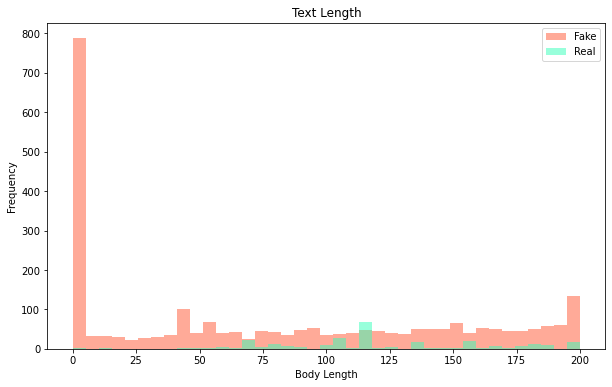

In [65]:
data['body_len'] = data['text'].apply(len)

bins = np.linspace(0, 200, 40)
plt.figure(figsize=(10, 6))
plt.hist(data[data["label"]== 1]["body_len"], bins, alpha=0.5, label="Fake", color="#FF5733")
plt.hist(data[data["label"]== 0]["body_len"], bins, alpha=0.5, label="Real", color="#33FFB8")
plt.legend(loc="upper left")
plt.xlabel('Body Length')
plt.ylabel('Frequency')
plt.title('Text Length')
plt.legend(loc='upper right')
plt.show()

### Text Cleaning <a name="text-cleaning"></a>

*We define a function to clean the text data, which includes several preprocessing steps to prepare the data for vectorization.*

#### Tokenization, Stopword Removal, and Stemming <a name="text-cleaning-steps"></a>

In [ ]:
ps = PorterStemmer()
def clean_text(txt):
        txt = txt.lower()
        txt = word_tokenize(txt)
        txt = [t for t in txt if t not in punctuation]
        txt = [t for t in txt if t not in stopwords.words("english")]
        txt = [ps.stem(t)for t in txt]
        txt = " ".join(txt)
        return txt
 

data.loc[:,"clean_text"]=data["text"].apply(clean_text)
print(data.head())

## 4. Feature Extraction <a name="feature-extraction"></a>

### TF-IDF Vectorization <a name="tf-idf-vectorization"></a>

*We transform the cleaned text data into numerical features using TF-IDF vectorization, which considers both term frequency and inverse document frequency.*


In [16]:
cv = TfidfVectorizer()
vector = cv.fit_transform(c_data["clean_text"])

In [17]:
print(vector.shape)

(71537, 211485)


In [18]:
features = pd.DataFrame.sparse.from_spmatrix(vector,columns=cv.get_feature_names_out())
target = data['label']

## 5. Model Training <a name="model-training"></a>

### Train-Test Split <a name="train-test-split"></a>

*We split the dataset into training and testing sets to evaluate the model's performance on unseen data.*

In [20]:
x_train,x_test,y_train,y_test = train_test_split(features,target)

### Multinomial Naive Bayes Classifier <a name="multinomial-naive-bayes-classifier"></a>

*We train a Multinomial Naive Bayes classifier, which is suitable for text classification tasks.*

In [21]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

### Random Forest Classifier <a name="random-forest-classifier"></a>

*We train a Random Forest classifier with 300 estimators to improve prediction accuracy.*


In [44]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300)

## 6. Model Evaluation <a name="model-evaluation"></a>

### Classification Reports <a name="classification-reports"></a>

*We evaluate both models using classification reports to compare their performance.*


In [45]:
crnb = classification_report(y_test,mnb.predict(x_test))
crf = classification_report(y_test,rf.predict(x_test))
print(crnb,crf)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      8807
           1       0.92      0.90      0.91      9078

    accuracy                           0.91     17885
   macro avg       0.91      0.91      0.91     17885
weighted avg       0.91      0.91      0.91     17885
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      8807
           1       0.94      0.95      0.94      9078

    accuracy                           0.94     17885
   macro avg       0.94      0.94      0.94     17885
weighted avg       0.94      0.94      0.94     17885



## 7. Model Saving and Deployment <a name="model-saving-and-deployment"></a>

### Saving Models with Pickle <a name="saving-models-with-pickle"></a>

*We save the trained models and vectorizer using the pickle module for future use without retraining.*


In [36]:
# vector creation
f= open("CV_FRN.pkl","wb")
dump(cv,f)
f.close()

# MultinomialNB model creation
f= open("MNB_FRN.pkl","wb")
dump(mnb,f)
f.close()

# RandomForestClassifier model creation
f= open("RF_FRN.pkl","wb")
dump(rf,f)
f.close()



### Loading Models for Prediction <a name="loading-models-for-prediction"></a>

*We demonstrate how to load the saved models and vectorizer to make predictions on new data.*


In [38]:
# laod in vector file for prediction
from pickle import load

f=open("CV_FRN.pkl","rb")
cv=load(f)
f.close()

f=open("MNB_FRN.pkl","rb")
mnb=load(f)
f.close()

f=open("RF_FRN.pkl","rb")
rf=load(f)
f.close()


## 8. Prediction on New Data <a name="prediction-on-new-data"></a>

*We accept user input, preprocess it, and use both models to predict whether the news is fake or real.*

In [58]:
# Prediction 

news = input("enter news text ") 

# Cleaned user input data
cnews=clean_text(news)

# vectorize cleaned data
vnews=cv.transform([cnews])

# predict using both Model
#MultinomialNB model
pred_mnb=mnb.predict(vnews)

#RandomForestClassifier model
pred_rf=rf.predict(vnews)

print(pred_rf[0],pred_mnb[0])

enter news text enter news textA dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled from Hinduism to Protestant Christianity and, ultimately, became what he calls an “evangelical Catholic.” Over two hours, Jindal, 42, recalled talking with a girl in high school who wanted to “save my soul,” reading the Bible in a closet so his parents would not see him and feeling a stir while watching a movie during his senior year that depicted Jesus on the cross. “I was struck, and struck hard,” Jindal told the pastors. “This was the Son of God, and He had died for our sins.” Jindal’s session with the Christian clergy, who lead congregations in the early presidential battleground states of Iowa and South Carolina, was part of a behind-the-scenes effort by the Louisiana governor to find a political base that could help propel him into the top tier of Republican

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


0 0


## 9. Challenges and Solutions <a name="challenges-and-solutions"></a>

*During the project, we faced several challenges due to the large size of the dataset and high dimensionality of the feature space.*

- **Memory Limitations:**
  - **Issue:** Memory errors occurred when processing n-grams and bigrams with `CountVectorizer`, resulting in over 600,000 features.
  - **Solution:** Switched to `TfidfVectorizer` and used a sparse matrix representation to handle the large feature set efficiently.

- **Processing Time:**
  - **Issue:** Data splitting and model training were time-consuming, with some steps taking several hours.
  - **Solution:** Opted for more efficient algorithms and limited the use of resource-intensive processes.

- **Data Preprocessing Decisions:**
  - **Issue:** Including stopwords led to increased dimensionality and memory issues.
  - **Solution:** Removed stopwords to reduce the feature space and avoid memory constraints.

---

## 10. Conclusion <a name="conclusion"></a>

*By carefully preprocessing the data and selecting appropriate models, we successfully built classifiers capable of distinguishing between fake and real news with high accuracy. The Random Forest Classifier performed better, achieving approximately 94% accuracy compared to 91% with Multinomial Naive Bayes. Despite challenges related to memory and processing time, the project demonstrates the effectiveness of machine learning in text classification tasks.*

---

## 11. Future Work <a name="future-work"></a>

*To further improve the model and its applicability, we plan to:*

- **Optimize Memory Usage:**
  - Explore dimensionality reduction techniques like PCA.
  - Utilize distributed computing methods.

- **Enhance Models:**
  - Experiment with deep learning architectures such as RNNs or Transformers.
  - Implement cross-validation for model robustness.

- **Advanced Feature Engineering:**
  - Incorporate word embeddings like Word2Vec or GloVe.
  - Use additional metadata features if available.

---

## 12. References <a name="references"></a>

- WELFake Dataset Publication: [IEEE Transactions on Computational Social Systems](https://doi.org/10.1109/TCSS.2021.3068519)
- NLTK Documentation: [NLTK 3.6.2](https://www.nltk.org/)
- Scikit-learn Documentation: [scikit-learn](https://scikit-learn.org/stable/)
- Python Pickle Module: [pickle — Python object serialization](https://docs.python.org/3/library/pickle.html)

---
